# Решающие деревья.

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [3]:
df = df.drop('State', axis=1)

In [8]:
df['International plan'].value_counts()

International plan
No     3010
Yes     323
Name: count, dtype: int64

In [9]:
df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1}).astype(int)

/tmp/ipykernel_127682/371646010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1}).astype(int)


In [10]:
df['Voice mail plan'].value_counts()

Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64

In [11]:
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1}).astype(int)

/tmp/ipykernel_127682/1525555139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1}).astype(int)


In [12]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [13]:
df['Churn'] = df['Churn'].replace({'False': 0, 'True': 1}).astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [14]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
International plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

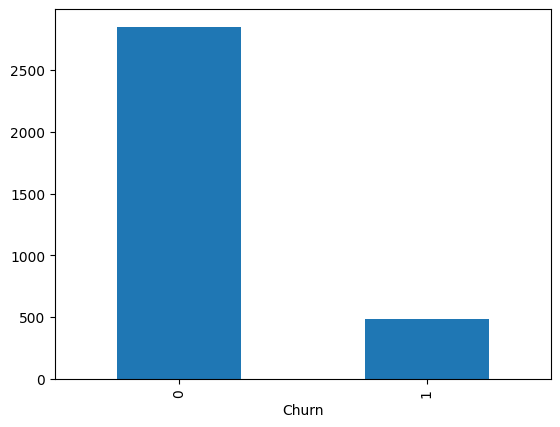

In [22]:
y.value_counts().plot(kind='bar');

Видно, что классы достаточно несбалансированны. Один класс превышает другой почти в 5 раз.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

# Обучаем StandardScaler на тренировочных данных
scaler.fit(X_train)

# Масштабируем признаки в тренировочной и тестовой выборках
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [27]:
# Преобразуем массивы numpy обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
X_train_scaled.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.511937,1.740454,-0.324289,-0.612192,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1,-0.939002,1.740454,-0.324289,-0.612192,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2,0.392435,1.740454,-0.324289,1.633475,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
3,-0.738030,-0.515843,-0.324289,-0.612192,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
4,0.492921,1.740454,-0.324289,1.633475,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563


In [30]:
X_test_scaled.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.317071,1.740454,-0.324289,-0.612192,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
1,-0.838516,-0.515843,-0.324289,-0.612192,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
2,-0.059751,-0.515843,-0.324289,-0.612192,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260
3,1.171201,-0.682096,-0.324289,-0.612192,-0.585483,0.601571,-1.087224,0.601949,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563
4,-0.109994,-0.682096,-0.324289,-0.612192,-0.585483,-0.661012,0.069247,-0.661069,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563


In [31]:
X_train_scaled.shape, X_test_scaled.shape

((2333, 18), (1000, 18))

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
# 1) Логистическая регрессия
# Создание модели с параметрами по умолчанию
logreg = LogisticRegression()

# Обучение модели на тренировочных данных
logreg.fit(X_train, y_train)

/home/zaur/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# 2) Метод опорных векторов (с kernel='linear')
# Создание модели с параметрами по умолчанию
svm = SVC(kernel='linear', probability=True)

# Обучение модели на тренировочных данных
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных.

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
# Предсказание на тестовых данных
y_pred_logistic = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [45]:
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

In [46]:
# Вывод результатов
print(f"ROC AUC для логистической регрессии: {roc_auc_logistic}")
print(f"ROC AUC для SVM (linear kernel): {roc_auc_svm}")

ROC AUC для логистической регрессии: 0.5174784375484492
ROC AUC для SVM (linear kernel): 0.506993006993007


Используем параметр predict_proba по умолчанию и посмотрим на результат.

In [47]:
# Делаем предсказания
lr_predictions = logreg.predict_proba(X_test)[:, 1]
svm_predictions = svm.predict_proba(X_test)[:, 1]

In [48]:
# Вычисляем roc_auc_score
lr_auc = roc_auc_score(y_test, lr_predictions)
svm_auc = roc_auc_score(y_test, svm_predictions)

In [50]:
import matplotlib.pyplot as plt

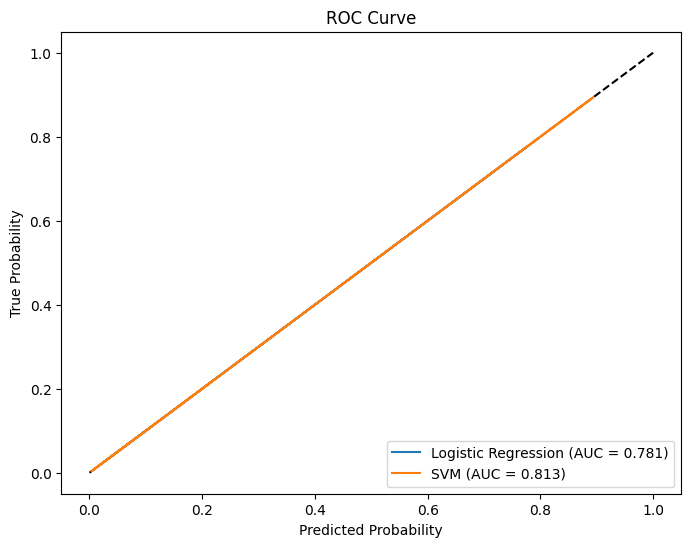

In [51]:
# Отображаем результаты на графике
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Диагональ
plt.plot(lr_predictions, lr_predictions, label='Logistic Regression (AUC = {:.3f})'.format(lr_auc))
plt.plot(svm_predictions, svm_predictions, label='SVM (AUC = {:.3f})'.format(svm_auc))

plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Создаем модель решающего дерева с параметрами по умолчанию
tree_model = DecisionTreeClassifier()

In [54]:
# Обучаем модель на тренировочных данных
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# Делаем предсказания на тестовых данных
y_pred = tree_model.predict_proba(X_test)[:, 1]

In [56]:
# Рассчитываем AUC
auc = roc_auc_score(y_test, y_pred)

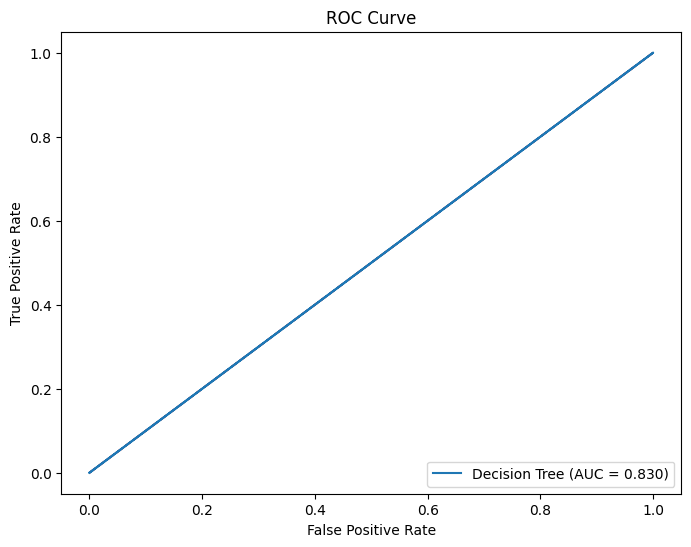

In [58]:
# Отображаем AUC на графике
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(y_pred, y_pred, label='Decision Tree (AUC = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

Обучение и оценка модели без масштабирования

In [61]:
# Обучение модели без масштабирования
model_no_scaling = DecisionTreeClassifier()
model_no_scaling.fit(X_train, y_train)

# Предсказание
y_pred_no_scaling = model_no_scaling.predict_proba(X_test)[:, 1]

# Оценка модели
roc_auc_no_scaling = roc_auc_score(y_test, y_pred_no_scaling)
print(f'ROC AUC без масштабирования: {roc_auc_no_scaling}')

ROC AUC без масштабирования: 0.8367985573353135


Обучение и оценка модели с масштабированием

In [62]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели с масштабированием
model_with_scaling = DecisionTreeClassifier()
model_with_scaling.fit(X_train_scaled, y_train)

# Предсказание
y_pred_with_scaling = model_with_scaling.predict_proba(X_test_scaled)[:, 1]

# Оценка модели
roc_auc_with_scaling = roc_auc_score(y_test, y_pred_with_scaling)
print(f'ROC AUC с масштабированием: {roc_auc_with_scaling}')

ROC AUC с масштабированием: 0.8408784914035788


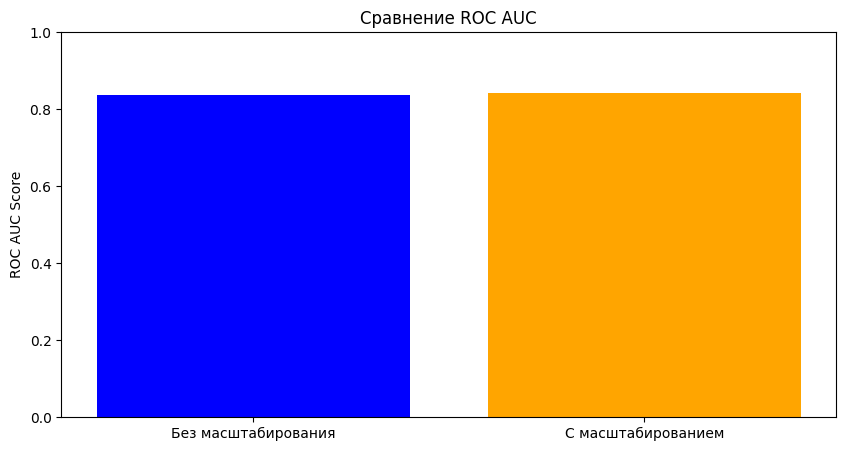

In [63]:
# Визуализация результатов
plt.figure(figsize=(10, 5))
scores = [roc_auc_no_scaling, roc_auc_with_scaling]
labels = ['Без масштабирования', 'С масштабированием']

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('ROC AUC Score')
plt.title('Сравнение ROC AUC')
plt.ylim(0, 1)
plt.show()

Ответ на вопрос о масштабировании:

Решающее дерево не требует масштабирования признаков, так как алгоритм основан на разделении по порогам и не чувствителен к величине признаков. Хотя значение метрики  ROC AUC после масштабирования незначительно улучшилось. Но в общем результаты почти одинаковые.

В итоге вы получите ROC AUC метрики как для модели без масштабирования, так и для модели с масштабированием, а также графическое представление результатов.

Какая модель справилась с решением задачи?

Если говорить в общем, то модель решающего дерева с масштабированием показала наилучшее значение метрики roc_auc_score.